In [1]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
LA = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guatemala', 'Guiana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Panama', 'Peru', 'Puerto Rico', 'Dominican Republic', 'Surinam', 'Uruguay', 'Venezuela']

## Number of films

In [3]:
%cypher MATCH (n:film) RETURN count(n) as Films

1 rows affected.


Films
359


## Number of LA films

In [4]:
lafilms = %cypher MATCH (n:film) WITH n match (n)-[:IS_FROM]-(c:country) WHERE c.name in {LA} RETURN c.name as Country, count(n) as Number_Films order by Number_Films desc
lafilms = lafilms.get_dataframe()
lafilms['Number_Films'].sum()

12 rows affected.


114

## Number of countries

In [5]:
%cypher MATCH (n:country) RETURN count(n) as Countries

1 rows affected.


Countries
87


## Number of LA countries

In [6]:
lafilms['Country'].count()

12

## Number of filmmakers

In [7]:
%cypher MATCH (n:director) RETURN count(n) as Filmmakers

1 rows affected.


Filmmakers
311


## Number of LA Filmmakers

In [8]:
%cypher MATCH (d:director)-[]-(n:film)-[:IS_FROM]-(c:country) WHERE c.name in {LA} with d RETURN count(d)

1 rows affected.


count(d)
125


## Top countries

In [9]:
%%cypher
match  (n:country)-[r :IS_FROM]-() with n, count(r) as deg order by deg desc limit 20 return n.name as Country, deg as Number_Films

20 rows affected.


Country,Number_Films
Argentina,40
China,27
Iran,24
Brazil,23
Philippines,22
Mexico,18
Indonesia,15
Chile,13
India,12
Germany,11


## LA top countries

In [10]:
lafilms

,Country,Number_Films
0,Argentina,40
1,Brazil,23
2,Mexico,18
3,Chile,13
4,Colombia,5
5,Peru,4
6,Uruguay,3
7,Cuba,3
8,Dominican Republic,2
9,Costa Rica,1


## Top directores 

In [11]:
%%cypher 
match  (n:director)-[r :DIRECTED]-() with n, count(r) as deg order by deg desc limit 20 return n.name as Filmmaker, deg as Number_Films

20 rows affected.


Filmmaker,Number_Films
Abolfazl Jalili,4
Raya Martin,4
Lav Diaz,4
John Torres,3
Mohammad Shirvani,3
Tariq Teguia,3
Riri Riza,3
Woo Ming Jin,3
Anocha Suwichakornpong,3
Alicia Scherson,2


## Top LA filmmakers

In [12]:
%%cypher 
match  (n:director)-[r :DIRECTED]-(f:film)-[:IS_FROM]-(c:country) where c.name in {LA} with n, count(r) as deg order by deg desc limit 20 return n.name as Filmmaker, deg as Number_Films

20 rows affected.


Filmmaker,Number_Films
Israel Cárdenas,4
Eduardo Villanueva,4
Laura Amelia Guzmán,4
Alicia Scherson,2
Héctor Gálvez Campos,2
Lisandro Alonso,2
Oscar Ruiz Navia,2
Carlos M. Quintela,2
Kiko Goifman,2
Felipe Guerrero,2


## Films by year

In [13]:
films =  %cypher match (n:film) return distinct n.fid as Id, n.name as Title, n.year as Year
films = films.get_dataframe()

lafilms =  %cypher match (n:film)-[:IS_FROM]-(c:country) where c.name in {LA} return distinct n.fid as Id, n.name as Title, n.year as Year 
lafilms = lafilms.get_dataframe()

359 rows affected.
105 rows affected.


In [14]:
df_year = films.groupby('Year', sort=False).agg({'Id':'count'})
df_year.columns = ['Number of films']

df_yearla= lafilms.groupby('Year', sort=False).agg({'Id':'count'})
df_yearla.columns = ['Number of LA films']

result = pd.concat([df_year, df_yearla], axis=1)
result.sort_values(by='Number of films', ascending=False)

,Number of films,Number of LA films
2009,31,7.0
2004,30,5.0
2011,27,9.0
2013,27,10.0
2003,26,8.0
2006,25,10.0
2010,25,5.0
2005,23,9.0
2008,22,7.0
2002,21,7.0


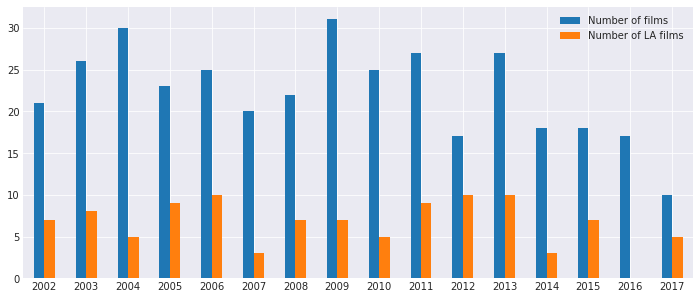

In [15]:
result = result.sort_index()
result.plot(rot = 0, kind='bar', figsize=(12,5))

## Awarded films

In [16]:
df_award = %cypher match (n:film) where n.award <> '' with n match (n)-[:IS_FROM]-(c:country) return distinct n.fid as Id, n.name as Title, n.year as Year, n.award as Award, n.section as Section, c.name as Country 
df_award = df_award.get_dataframe()
df_award

39 rows affected.


,Id,Title,Year,Award,Section,Country
0,f272,What They Don't Talk About When They Talk Abou...,2013,NETPAC Award,Hivos Tiger Awards Competition,Indonesia
1,f168,Blind Pig Who Wants to Fly,2009,FIPRESCI Award 2009,VPRO Tiger Awards Competition,Indonesia
2,f258,Abrir puertas y ventanas,2012,Golden Leopard in Locarno.,Bright Future,Argentina
3,f101,Glue,2006,MovieZone Award 2006,VPRO Tiger Awards Competition,Argentina
4,f34,Extraño,2003,Tiger Award 2003,None,Argentina
5,f2,Bolivia,2002,KNF Award 2002,None,Argentina
6,f271,Fat Shaker,2013,Hivos Tiger Award,Hivos Tiger Awards Competition,Iran
7,f169,Be Calm and Count to Seven,2009,VPRO Tiger Award 2009,VPRO Tiger Awards Competition,Iran
8,f93,Story Undone,2005,Amnesty International DOEN Award 2005,Time and Tide,Iran
9,f47,Women`s Prison,2003,Amnesty International DOEN Award 2003,None,Iran


## LA Awarded films

In [18]:
la_award = %cypher match (n:film) where n.award <> '' with n match (n)-[:IS_FROM]-(c:country) where c.name in {LA} return distinct n.fid as Id, n.name as Title, n.year as Year, n.award as Award, n.section as Section, c.name as Country 
la_award = la_award.get_dataframe()
la_award

12 rows affected.


,Id,Title,Year,Award,Section,Country
0,f258,Abrir puertas y ventanas,2012,Golden Leopard in Locarno.,Bright Future,Argentina
1,f101,Glue,2006,MovieZone Award 2006,VPRO Tiger Awards Competition,Argentina
2,f34,Extraño,2003,Tiger Award 2003,None,Argentina
3,f2,Bolivia,2002,KNF Award 2002,None,Argentina
4,f255,Neighbouring Sounds,2012,FIPRESCI Award 2012,Tiger Awards Competition,Brazil
5,f153,Mutum,2008,Dioraphte Award 2008,Sturm und Drang,Brazil
6,f201,Agua fría de mar,2010,Tiger Award 2010,VPRO Tiger Award Competition,Costa Rica
7,f270,Penumbra,2013,Lions Film Award,Hivos Tiger Awards Competition,Mexico
8,f253,De jueves a domingo,2012,Hivos Tiger Award 2012,Tiger Awards Competition,Chile
9,f178,Tony Manero,2009,KNF Award 2009,Bright Future,Chile


## Number of awarded films by country

In [19]:
df_award = df_award.groupby('Country', sort=False).agg({'Id': 'count'})
df_award.columns = ['Number of films']
df_award.sort_values(by='Number of films', ascending=False)

,Number of films
Country,
Iran,5
China,5
Thailand,4
Argentina,4
Chile,3
Indonesia,2
The Netherlands,2
Brazil,2
Malaysia,2


## Number of awarded LA films by country

In [20]:
la_award = la_award.groupby('Country', sort=False).agg({'Id': 'count'})
la_award.columns = ['Number of films']
la_award.sort_values(by='Number of films', ascending=False)

,Number of films
Country,
Argentina,4
Chile,3
Brazil,2
Costa Rica,1
Mexico,1
Uruguay,1


## Awarded Filmmakers 

In [21]:
df_directors = %cypher match (n:film) where n.award <> '' with n match (n)-[:DIRECTED]-(d:director) return distinct n.fid as Id, n.name as Title, n.year as Year, n.award as Award, n.section as Section, d.name as Director 
df_directors = df_directors.get_dataframe()
df_directors

36 rows affected.


,Id,Title,Year,Award,Section,Director
0,f185,Agrarian Utopia,2009,Special Mention NETPAC Jury 2009,Bright Future,Uruphong Raksasad
1,f201,Agua fría de mar,2010,Tiger Award 2010,VPRO Tiger Award Competition,Paz Fábrega
2,f169,Be Calm and Count to Seven,2009,VPRO Tiger Award 2009,VPRO Tiger Awards Competition,Ramtin Lavafipour
3,f273,Wadjda,2013,Dioraphte Award,Hivos Tiger Awards Competition,Haifaa Al Mansour
4,f104,Walking On the Wild Side,2006,Tiger Award 2006,VPRO Tiger Awards Competition,Han Jie
5,f139,Dancing Bells,2007,Special Mention Netpac 2007,Cinema of the Future: Sturm und Drang,Deepak Kumaran Menon
6,f258,Abrir puertas y ventanas,2012,Golden Leopard in Locarno.,Bright Future,Milagros Mumenthaler
7,f272,What They Don't Talk About When They Talk Abou...,2013,NETPAC Award,Hivos Tiger Awards Competition,Mouly Surya
8,f146,"El cielo, la tierra y la lluvia",2008,FIPRESCI Award 2008,VPRO Tiger Awards Competition,Jose Luis Torres Leiva
9,f103,La perrera,2006,Tiger Award 2006,VPRO Tiger Awards Competition,Manuel Nieto Zas


## 

In [24]:
la_directors = %cypher match (n:film)-[:IS_FROM]-(c:country) WHERE c.name in {LA} and n.award <> '' with n match (n)-[:DIRECTED]-(d:director) return distinct n.fid as Id, n.name as Title, n.year as Year, n.award as Award, n.section as Section, d.name as Director 
la_directors = la_directors.get_dataframe()
la_directors

12 rows affected.


,Id,Title,Year,Award,Section,Director
0,f258,Abrir puertas y ventanas,2012,Golden Leopard in Locarno.,Bright Future,Milagros Mumenthaler
1,f101,Glue,2006,MovieZone Award 2006,VPRO Tiger Awards Competition,Alexis Dos Santos
2,f34,Extraño,2003,Tiger Award 2003,None,Santiago Loza
3,f2,Bolivia,2002,KNF Award 2002,None,Adrian Caetano
4,f255,Neighbouring Sounds,2012,FIPRESCI Award 2012,Tiger Awards Competition,Kleber Mendonça Filho
5,f153,Mutum,2008,Dioraphte Award 2008,Sturm und Drang,Sandra Kogut
6,f201,Agua fría de mar,2010,Tiger Award 2010,VPRO Tiger Award Competition,Paz Fábrega
7,f270,Penumbra,2013,Lions Film Award,Hivos Tiger Awards Competition,Eduardo Villanueva
8,f253,De jueves a domingo,2012,Hivos Tiger Award 2012,Tiger Awards Competition,Dominga Sotomayor
9,f178,Tony Manero,2009,KNF Award 2009,Bright Future,Pablo Larraín


## Number of awards per filmmaker

In [25]:
df_directors = df_directors.groupby('Director', sort=False).agg({'Id': 'count'})
df_directors.columns = ['Number of awards']
df_directors.sort_values(by='Number of awards', ascending=False)

,Number of awards
Director,
Uruphong Raksasad,1
Paz Fábrega,1
Mohammad Shirvani,1
Miaoyan Zhang,1
Alexis Dos Santos,1
Adrian Caetano,1
Tan Chui Mui,1
Sandra Kogut,1
Babak Payami,1
